[yfinance_fix] Patch erfolgreich angewendet.
[yfinance_fix] Chrome-Session erstellt.
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume  \
Date                                                                   
2024-10-22  574.615540  575.777924  571.719409  572.379394  34183800   
2024-10-23  569.365051  573.029572  565.848317  572.586275  49314600   
2024-10-24  570.596375  571.404145  567.966234  571.325322  34979900   
2024-10-25  570.399353  575.738517  569.453717  572.832526  47268200   
2024-10-28  572.162781  574.014732  571.857409  573.886667  30174700   

Price           12_ema      27_ema      MACD    Signal  MACD_HIST  Strategy  \
Date                                                                          
2024-10-22  574.615540  574.615540  0.000000  0.000000   0.000000       NaN   
2024-10-23  571.771525  571.893064 -0.121539 -0.067522  -0.054017      -1.0   
2024-10-24  571.312864  571.428437 -0.115573 -0.087215  -0.028358      -1.0   
2024-10-25  571.024504  571.141901 -0.117397 -0.097439  -0.019958      -1.0   
2024-10-28  571.33377

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_HIST,Strategy,asset_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2024-10-22,574.615540,575.777924,571.719409,572.379394,34183800,574.615540,574.615540,0.000000,0.000000,0.000000,NaN,NaN,NaN
2024-10-23,569.365051,573.029572,565.848317,572.586275,49314600,571.771525,571.893064,-0.121539,-0.067522,-0.054017,-1.0,-0.009137,0.009137
2024-10-24,570.596375,571.404145,567.966234,571.325322,34979900,571.312864,571.428437,-0.115573,-0.087215,-0.028358,-1.0,-0.006995,0.006955
2024-10-25,570.399353,575.738517,569.453717,572.832526,47268200,571.024504,571.141901,-0.117397,-0.097439,-0.019958,-1.0,-0.007337,0.007303
2024-10-28,572.162781,574.014732,571.857409,573.886667,30174700,571.333770,571.377402,-0.043632,-0.081433,0.037801,-1.0,-0.004269,0.004189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-26,690.309998,691.659973,689.270020,690.640015,41613300,683.202285,679.325435,3.876849,2.973444,0.903405,1.0,0.201342,-0.142526
2025-12-29,687.849976,689.200012,686.070007,687.539978,62559500,683.917314,679.934331,3.982983,3.175352,0.807631,1.0,0.197061,-0.145582
2025-12-30,687.010010,688.559998,686.580017,687.450012,47160700,684.393113,680.439737,3.953377,3.330957,0.622420,1.0,0.195599,-0.146625


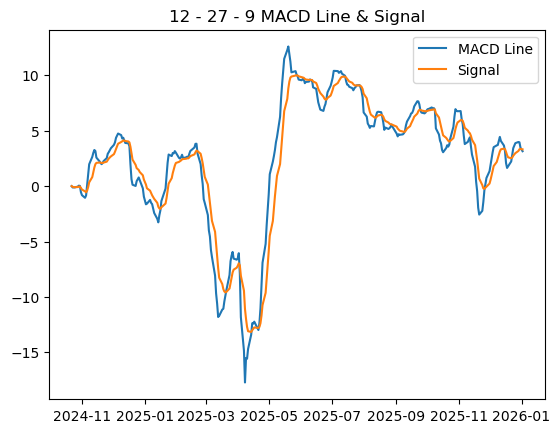

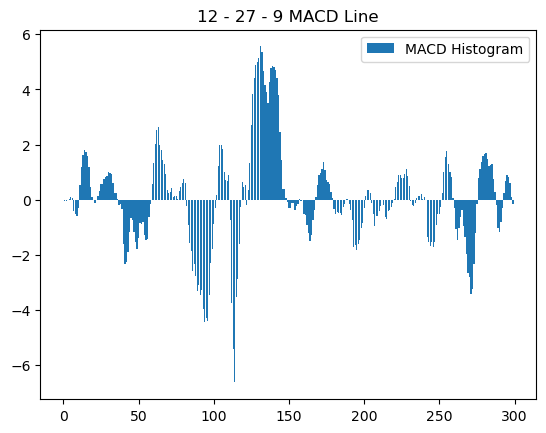

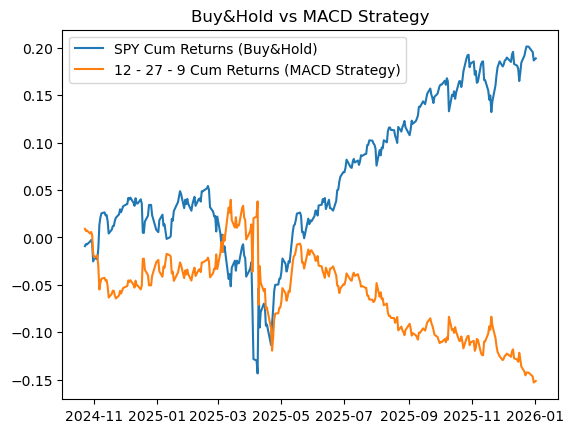

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np # FOR np.where

# MACD Indicator is used to explain Trends. 
# Bullish Momentum: when the signal line crosses above the MACD Line
# Bearish Momentum: when the signal line crosses below the MACD Line

TICKER = "SPY"
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9 # Difference between those two values 
LOOKBACK = 100
import yfinance_fix

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01",session=yfinance_fix.chrome_session,)
    df.columns = df.columns.get_level_values(0)
    # Only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:,:]

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    # We will be using EMA (Exponential Moving Average from now on, because they are more exact)
    
        # Step 1: Create Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

        # Step 2: Create MACD Column (Macd line is the difference between the fast and the slow)
    df[f"MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

        # Step 3: Create MACD Signal Column (Span here = 9-period) == moving average of this line
    df["Signal"] = df[f"MACD"].ewm(span=span).mean()

        # Step 4: MACD Hist is almost always what is used fin TA
    df["MACD_HIST"] = df[f"MACD"] - df[f"Signal"]

        # Step 5: Plot Functions
    plt.figure()
    plt.plot(df["MACD"]) # Blue
    plt.plot(df["Signal"]) # Orange
        # When MACD (Blue Line) crosses above the Signal (Orange line) == Upwards momentum (Long)
        # When MACD (Blue Line) crosses below the Signal (Orange line) == Downwards momentum (Short)
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line & Signal")
    plt.legend(["MACD Line", "Signal"])

        # Step 6: Plot Histogram 
    plt.figure()
    # Histogram Strategy (Crossover == Signal to Enter) - Plot a bar Chart:
        # Previous Version: 
    # plt.bar(x=df.index, height=df["MACD_HIST"])
        # Current Version
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: bar tall (strong momentum) or short (weak momentum)?
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])

    return df

def add_strategy(df): # Column to multiply our Cummulative Returns by
    # df["Strategy"] = 0 # fills all rows with 0
    # Long when Bullish Momentum, Short for Bearish Momentum
    df["Strategy"] = np.where(df["MACD_HIST"] > 0, 1, -1)
    # Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["Strategy"] = df["Strategy"].shift(1)

    return df

# Use Numpy to Calculate Cumulative Returns
# def test_strategy(df, ticker, fast, slow):
#     df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
#     df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1
#     return df

def test_strategy(df):
    # Buy&Hold vs MACD Strategy
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1 
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1

    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} Cum Returns (MACD Strategy)"])
    plt.title("Buy&Hold vs MACD Strategy")
    # plt.title("MACD Histogram Strategy Returns")
    return df

## Visualizing the Data Set
def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)
    print(df.head())

    return df

main()

In [8]:
plt.plot(df["MACD"]) # Blue
plt.plot(df["Signal"]) # Orange

# Histogram Strategy:
# When the blue line crosses above the orange line, that signalizes upwards moemntum 
# And when the blue line crosses below the orange line, that is downwards moemntum 
# A Crossover is usually a signal to enter

plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")

NameError: name 'df' is not defined

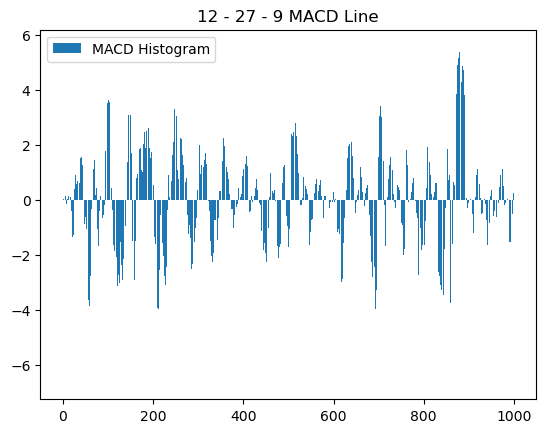

In [ ]:
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: is the bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: is the bar tall (strong momentum) or short (weak momentum)?
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])